# Lead Scoring Case Study

- Step 1 : Importing and Inspecting the data
- Step 2 : Preparing the data
- Step 3 : Train- Test split
- Step 4 : Model Building
- Step 5 : Metrics Evaluation
- Step 6 : Ealuation on Test Set

In [509]:
# importing neccesary libraries 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step 1 : Importing and Inspecting the data

In [510]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [511]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [512]:
lead.shape

(9240, 37)

In [513]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Handling missing valuees and EDA

In [514]:
# Checking percentage of missing values
round((100* lead.isnull().sum()/len(lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [515]:
# After checking columns 'Select' is found in many columns which means have not made a selection. we will replace this np.nan
lead = lead.replace('Select', np.nan)

round((100* lead.isnull().sum()/len(lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [516]:
# Dropping columns with more than 50% missing values
l=[]
for col in lead.columns:
    if lead[col].isnull().sum()/len(lead) >0.5:
        l.append(col)
l

['How did you hear about X Education', 'Lead Quality', 'Lead Profile']

In [517]:
lead = lead.drop(l, axis =1)
lead.shape

(9240, 34)

In [518]:
#Checking other columns with Asymmetrique__X
print('Asymmetrique Activity Index:\n',lead['Asymmetrique Activity Index'].value_counts(),'\n')
print('Asymmetrique Profile Index:\n',lead['Asymmetrique Profile Index'].value_counts(),'n')
print('Asymmetrique Activity Score:\n',lead['Asymmetrique Activity Score'].value_counts(),'\n')
print('Asymmetrique Profile Score:\n',lead['Asymmetrique Profile Score'].value_counts(),'\n')

Asymmetrique Activity Index:
 02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64 

Asymmetrique Profile Index:
 02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64 n
Asymmetrique Activity Score:
 14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64 

Asymmetrique Profile Score:
 15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64 



In [519]:
# We will not impute missing values with mean or median as it will bring bias. Lets drop these columns
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1)
lead.shape

(9240, 30)

In [520]:
# Checking percentage of missing values
round((100* lead.isnull().sum()/len(lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [521]:
#Checking other columns with higher missing values
print('Country:\n',round(lead['Country'].value_counts(normalize=True),2),'\n\n')
print('Specialization:\n',lead['Specialization'].value_counts(),'\n\n')
print('How did you hear about X Education:\n',lead['How did you hear about X Education'].value_counts(),'\n\n')
print('What is your current occupation:\n',lead['What is your current occupation'].value_counts(),'\n\n')
print('What matters most to you in choosing a course:\n',lead['What matters most to you in choosing a course'].value_counts(),'\n\n')
print('Tags:\n',lead['Tags'].value_counts(),'\n\n')
print('Lead Profile:\n',lead['Lead Profile'].value_counts(),'\n\n')
print('City:\n',lead['City'].value_counts(),'\n\n')

Country:
 India                   0.96
United States           0.01
United Arab Emirates    0.01
Singapore               0.00
Saudi Arabia            0.00
United Kingdom          0.00
Australia               0.00
Qatar                   0.00
Hong Kong               0.00
Bahrain                 0.00
Oman                    0.00
France                  0.00
unknown                 0.00
South Africa            0.00
Nigeria                 0.00
Germany                 0.00
Kuwait                  0.00
Canada                  0.00
Sweden                  0.00
China                   0.00
Asia/Pacific Region     0.00
Uganda                  0.00
Bangladesh              0.00
Italy                   0.00
Belgium                 0.00
Netherlands             0.00
Ghana                   0.00
Philippines             0.00
Russia                  0.00
Switzerland             0.00
Vietnam                 0.00
Denmark                 0.00
Tanzania                0.00
Liberia                 0.00
Mala

KeyError: 'How did you hear about X Education'

In [522]:
#dropping columns with more than 35% missing values to avoid bias
drop = []
for col in lead.columns:
    if (lead[col].isnull().sum()/len(lead)) > 0.35:
        drop.append(col)
drop

['Specialization', 'Tags', 'City']

In [523]:
lead = lead.drop(drop, axis=1)
lead.shape

(9240, 27)

In [524]:
round((100* lead.isnull().sum()/len(lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [525]:
#Lets check other columns with missing values
print('Country:\n',round(lead['Country'].value_counts(normalize=True),2),'\n\n')

Country:
 India                   0.96
United States           0.01
United Arab Emirates    0.01
Singapore               0.00
Saudi Arabia            0.00
United Kingdom          0.00
Australia               0.00
Qatar                   0.00
Hong Kong               0.00
Bahrain                 0.00
Oman                    0.00
France                  0.00
unknown                 0.00
South Africa            0.00
Nigeria                 0.00
Germany                 0.00
Kuwait                  0.00
Canada                  0.00
Sweden                  0.00
China                   0.00
Asia/Pacific Region     0.00
Uganda                  0.00
Bangladesh              0.00
Italy                   0.00
Belgium                 0.00
Netherlands             0.00
Ghana                   0.00
Philippines             0.00
Russia                  0.00
Switzerland             0.00
Vietnam                 0.00
Denmark                 0.00
Tanzania                0.00
Liberia                 0.00
Mala

In [526]:
#Lets impute these missing values with mode
lead['Country'] = lead['Country'].fillna(lead['Country'].mode()[0])

In [527]:
print('What is your current occupation:\n',lead['What is your current occupation'].value_counts(),'\n\n')

What is your current occupation:
 Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64 




In [528]:
lead['What is your current occupation'] = lead['What is your current occupation'].fillna(lead['What is your current occupation'].mode()[0])

In [529]:
print('What matters most to you in choosing a course:\n',lead['What matters most to you in choosing a course'].value_counts(),'\n\n')

What matters most to you in choosing a course:
 Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64 




In [530]:
#Lets impute these missing values with mode
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna(lead['What matters most to you in choosing a course'].mode()[0])

In [531]:
round((100* lead.isnull().sum()/len(lead)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [532]:
#Lets drop remaining missing row values as they are very small in number
lead = lead.dropna()

In [533]:
round((100* lead.isnull().sum()/len(lead)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [534]:
#There are no missing values now
lead.shape

(9074, 27)

In [535]:
# Checking for unique value columns
lead.nunique()

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [536]:
lead = lead.drop(['Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [537]:
lead = lead.drop('Prospect ID', axis =1)

In [538]:
lead.shape

(9074, 17)

In [539]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [540]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,Modified


In [541]:
cat = lead.select_dtypes(include='object')
cat_col = cat.columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [542]:
for i in cat_col:
    print(lead[i].value_counts(), '\n')

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 

No     8358
Yes     716
Name: Do Not Email, dtype: int64 

No     9072
Yes       2
Name: Do Not Call, dtype: int64 

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website       

In [543]:
#columns with yes no value
yn_var = ['Do Not Email', 'Do Not Call', 
'Through Recommendations','A free copy of Mastering The Interview' ]

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[yn_var] = lead[yn_var].apply(binary_map)

In [544]:
cat2 = lead.select_dtypes(include='object')
cat_col2 = cat2.columns
cat_col2

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Last Notable Activity'],
      dtype='object')

In [545]:
lead.shape

(9074, 17)

Text(0.5, 1.0, 'Lead Origin')

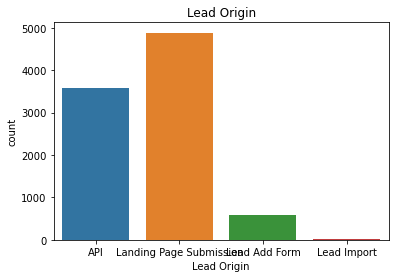

In [546]:
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')

Text(0.5, 1.0, 'Do Not Email')

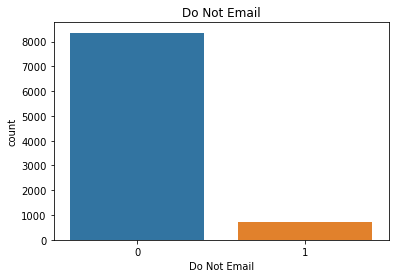

In [547]:
sns.countplot(lead['Do Not Email'])
plt.title('Do Not Email')

Text(0.5, 1.0, 'Do Not Call')

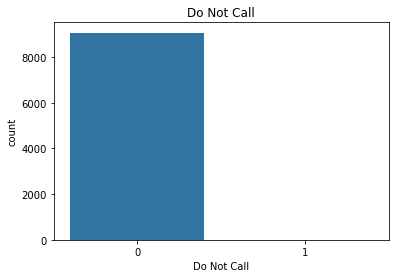

In [548]:
sns.countplot(lead['Do Not Call'])
plt.title('Do Not Call')

Text(0.5, 1.0, 'Country')

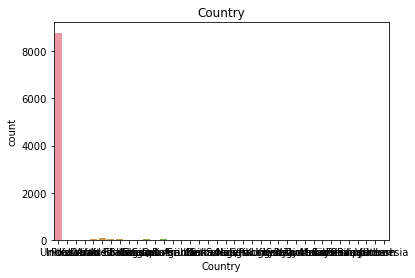

In [549]:
sns.countplot(lead['Country'])
plt.title('Country')

Text(0.5, 1.0, 'Search')

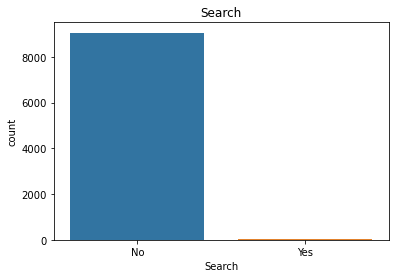

In [550]:
sns.countplot(lead['Search'])
plt.title('Search')

Text(0.5, 1.0, 'Through Recommendations')

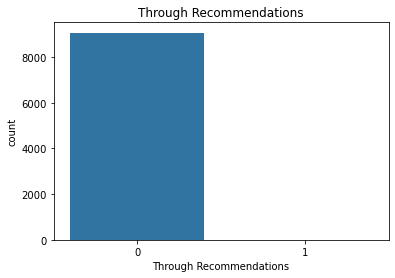

In [551]:
sns.countplot(lead['Through Recommendations'])
plt.title('Through Recommendations')

Text(0.5, 1.0, 'A free copy of Mastering The Interview')

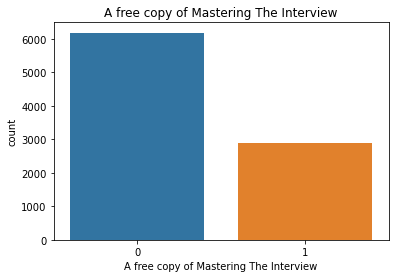

In [552]:
sns.countplot(lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

Text(0.5, 1.0, 'Last Notable Activity')

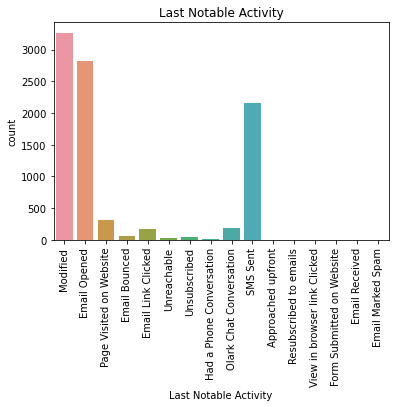

In [553]:
sns.countplot(lead['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

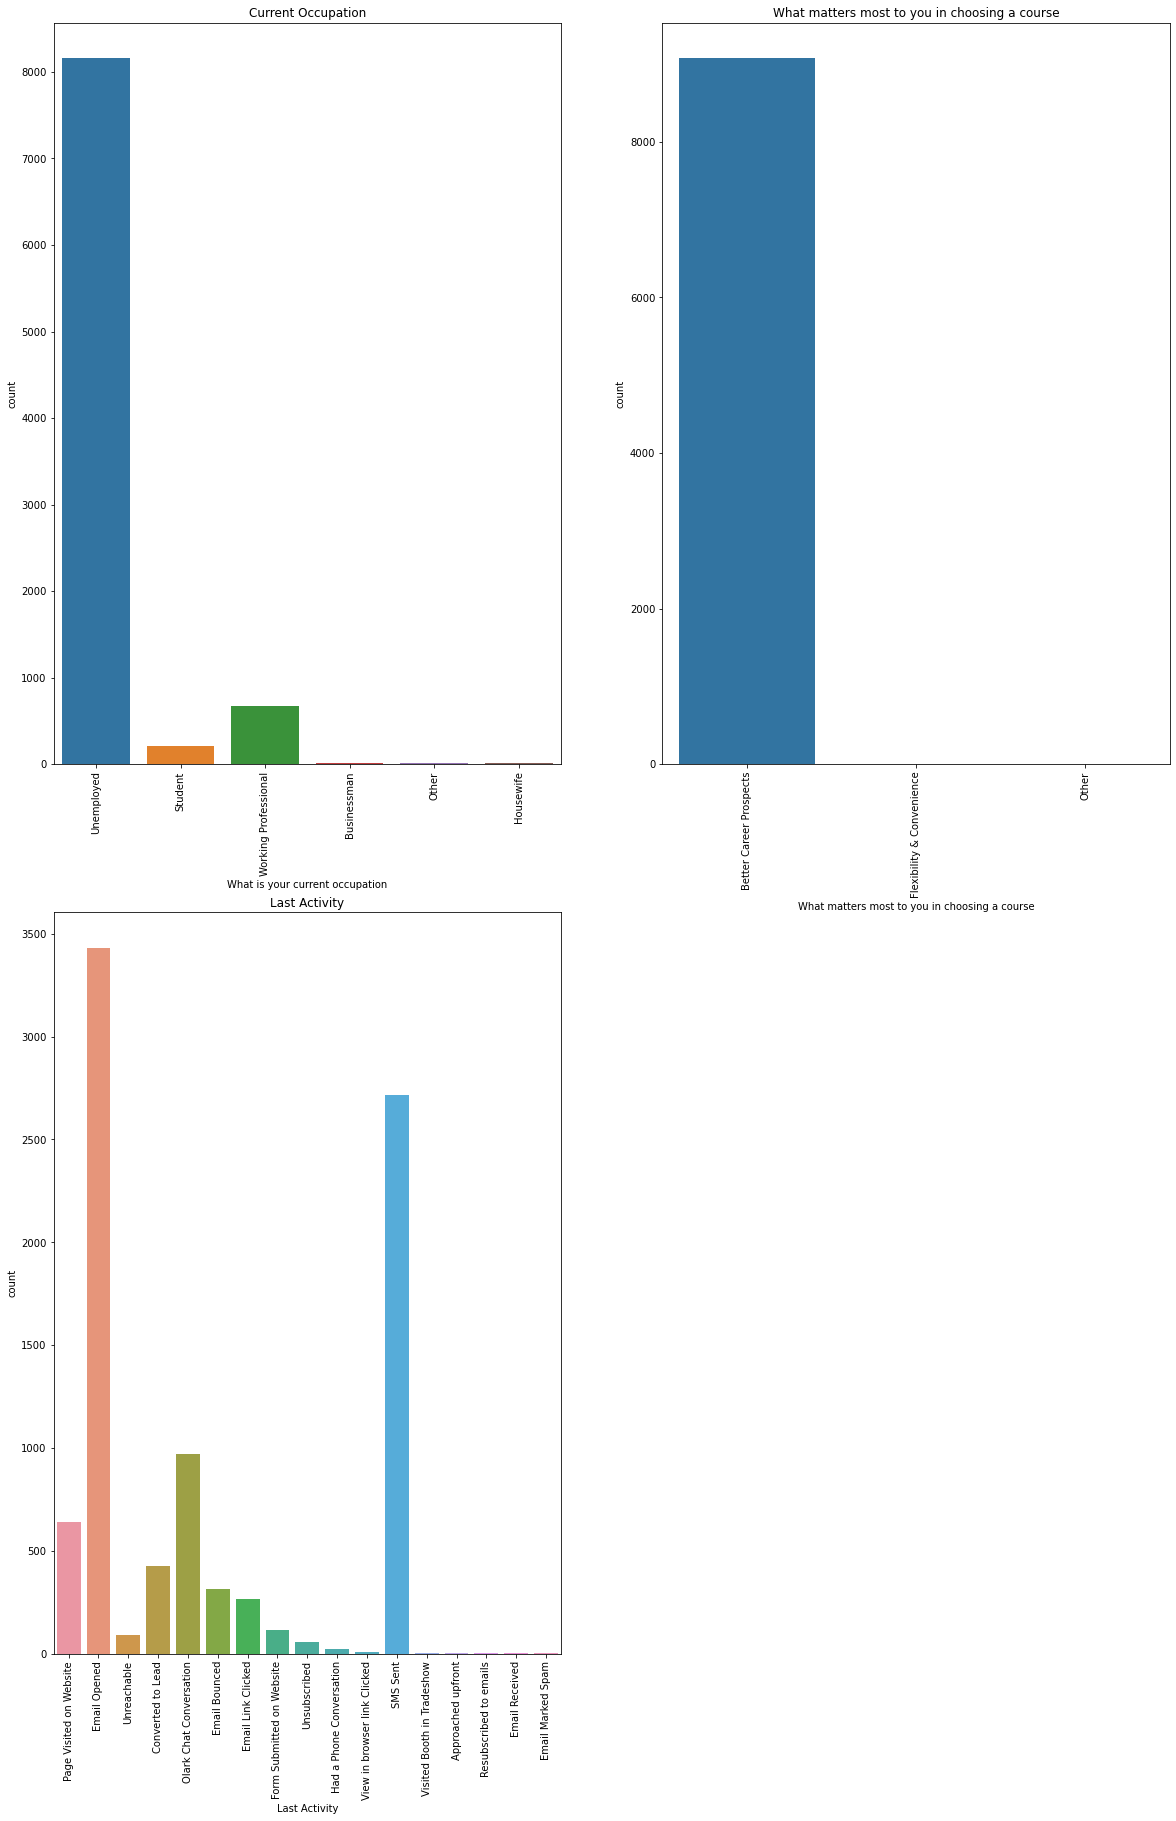

In [554]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(lead['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,2)
sns.countplot(lead['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,3)
sns.countplot(lead['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

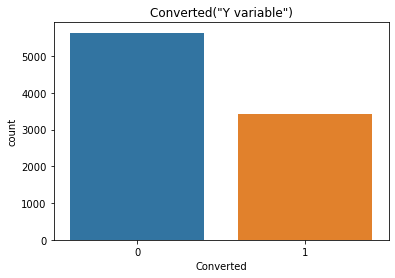

In [555]:
sns.countplot(lead['Converted'])
plt.title('Converted("Y variable")')
plt.show()

In [556]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[cat_col2], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [557]:
# We have created 98 columns. But we want to reduce this. SO lets explore these columns
# Lead Origin
print(lead['Lead Origin'].value_counts(normalize=True), '\n')

#Lets keep Two higher entries and convert values with lesser entries to Others
lead['Lead Origin'].replace({'Lead Add Form': 'Others','Lead Import': 'Others' }, inplace=True)

print(lead['Lead Origin'].value_counts(normalize=True), '\n')

Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64 

Landing Page Submission    0.538351
API                        0.394313
Others                     0.067335
Name: Lead Origin, dtype: float64 



In [558]:
#Lets keep Two higher entries and convert values with lesser entries to Others
a = list(lead['Country'].value_counts().reset_index(name='count').query('count < 50')['index'])
lead['Country'] = lead['Country'].replace(dict.fromkeys(a, 'Others'))  
lead['Country'].value_counts()

India                   8787
Others                   165
United States             69
United Arab Emirates      53
Name: Country, dtype: int64

In [559]:
#Lead Source
print(lead['Lead Source'].value_counts())
a1 = list(lead['Lead Source'].value_counts().reset_index(name='count').query('count < 1000')['index'])
lead['Lead Source'] = lead['Lead Source'].replace(dict.fromkeys(a1, 'Others'))  
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


Google            2868
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Others             756
Name: Lead Source, dtype: int64

In [560]:
#Last Activity
print(lead['Last Activity'].value_counts())
a2 = list(lead['Last Activity'].value_counts().reset_index(name='count').query('count < 900')['index'])
lead['Last Activity'] = lead['Last Activity'].replace(dict.fromkeys(a2, 'Others'))  
print(lead['Last Activity'].value_counts())

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64
Email Opened               3432
SMS Sent                   2716
Others                     1954
Olark Chat Conversation     972
Name: Last Activity, dtype: int64


In [561]:
# What is your current occupation
print(lead['What is your current occupation'].value_counts())
a3 = list(lead['What is your current occupation'].value_counts().reset_index(name='count').query('count < 200')['index'])
lead['What is your current occupation'] = lead['What is your current occupation'].replace(dict.fromkeys(a3, 'Others'))  
print(lead['What is your current occupation'].value_counts())

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64
Unemployed              8159
Working Professional     677
Student                  206
Others                    32
Name: What is your current occupation, dtype: int64


In [562]:
# What matters most to you in choosing a course
print(lead['What matters most to you in choosing a course'].value_counts())
a4 = list(lead['What matters most to you in choosing a course'].value_counts().reset_index(name='count').query('count < 200')['index'])
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(dict.fromkeys(a4, 'Others'))  
print(lead['What matters most to you in choosing a course'].value_counts())

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
Better Career Prospects    9072
Others                        2
Name: What matters most to you in choosing a course, dtype: int64


In [563]:
#Last Notable Activity
print(lead['Last Notable Activity'].value_counts())
a5 = list(lead['Last Notable Activity'].value_counts().reset_index(name='count').query('count < 2000')['index'])
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(dict.fromkeys(a5, 'Others'))  
print(lead['Last Notable Activity'].value_counts())

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64
Modified        3267
Email Opened    2823
SMS Sent        2152
Others           832
Name: Last Notable Activity, dtype: int64


In [564]:
cat3 = lead.select_dtypes(include='object')
cat_col3 = cat3.columns
cat_col3

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Last Notable Activity'],
      dtype='object')

In [565]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy2 = pd.get_dummies(lead[cat_col2], drop_first=True)
dummy2

,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Country_Others,Country_United Arab Emirates,Country_United States,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Search_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
9236,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
9237,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
9238,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [566]:
lead = pd.concat([lead, dummy2], axis=1)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Country_Others,Country_United Arab Emirates,Country_United States,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Search_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Others,India,Unemployed,Better Career Prospects,No,0,0,Modified,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,0,0,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,0,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,India,Unemployed,Better Career Prospects,No,0,0,Modified,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Others,India,Unemployed,Better Career Prospects,No,0,0,Modified,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [567]:
lead  = lead.drop(cat_col3, axis=1)

In [568]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9074 non-null   int64  
 1   Do Not Email                                          9074 non-null   int64  
 2   Do Not Call                                           9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Through Recommendations                               9074 non-null   int64  
 8   A free copy of Mastering The Interview                9074

In [569]:
lead.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Country_Others,Country_United Arab Emirates,Country_United States,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Search_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


#### Checking Outliers

In [570]:
lead.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Country_Others,Country_United Arab Emirates,Country_United States,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Search_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.000771,0.318272,0.538351,0.067335,0.316068,0.193189,0.127177,0.083315,0.107119,0.215341,0.299317,0.018184,0.005841,0.007604,0.022702,0.899162,0.074609,0.000220,0.001543,0.360040,0.091691,0.237161
std,23348.029512,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.027766,0.465831,0.498554,0.250616,0.464965,0.394822,0.333189,0.276373,0.309282,0.411081,0.457984,0.133623,0.076206,0.086874,0.148961,0.301130,0.262774,0.014845,0.039251,0.480038,0.288605,0.425365
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [571]:
#3 columns have numerical values
lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


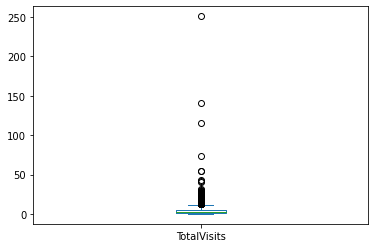

In [572]:
lead['TotalVisits'].plot(kind='box')
plt.show()

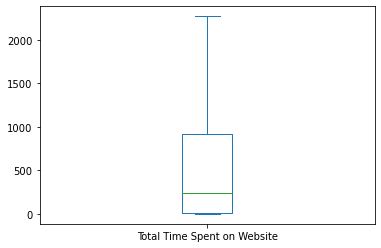

In [573]:
lead['Total Time Spent on Website'].plot(kind='box')
plt.show()

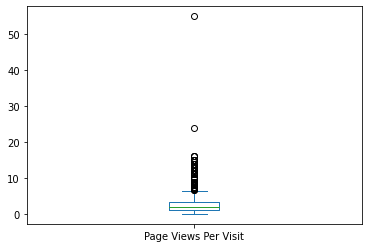

In [574]:
lead['Page Views Per Visit'].plot(kind='box')
plt.show()

In [575]:
lead = lead[~(lead['TotalVisits'] > 12)]

<AxesSubplot:>

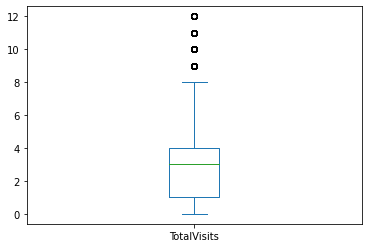

In [576]:
lead['TotalVisits'].plot(kind='box')

In [577]:
lead = lead[~(lead['Page Views Per Visit'] > 10)]

<AxesSubplot:>

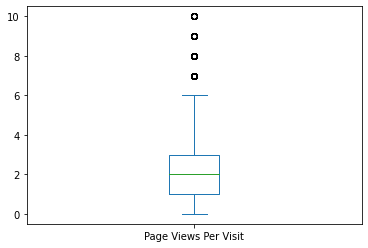

In [578]:
lead['Page Views Per Visit'].plot(kind='box')

In [579]:
lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8829.000000,8829.000000,8829.000000
mean,3.019708,476.440254,2.272247
std,2.623837,543.443647,1.923375
min,0.000000,0.000000,0.000000
25%,1.000000,5.000000,1.000000
50%,3.000000,239.000000,2.000000
75%,4.000000,906.000000,3.000000
90%,7.000000,1368.200000,5.000000
95%,8.000000,1552.000000,6.000000
99%,11.000000,1838.440000,8.000000


In [580]:
# So now we have managed to deal with the Outliers

### Step 3 : Train Test Split

In [581]:
from sklearn.model_selection import train_test_split

In [582]:
X  = lead.drop(['Lead Number','Converted'] , axis =1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Country_Others,Country_United Arab Emirates,Country_United States,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Search_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,2.0,1428,1.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [583]:
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [584]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [585]:
from sklearn.preprocessing import StandardScaler

In [586]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Country_Others,Country_United Arab Emirates,Country_United States,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Search_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
53,0,0,1.110186,-0.346754,-0.401859,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1928,0,0,-0.016345,1.389408,-0.401859,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3016,0,0,0.359165,0.024362,0.895188,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6338,0,0,0.734676,-0.558033,-0.313659,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
8532,0,0,-0.391855,-0.787684,-0.142449,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [587]:
### Checking the Converted Rate
converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

37.68263676520557

#### We have 37% converted rate

#### Checking Correlations

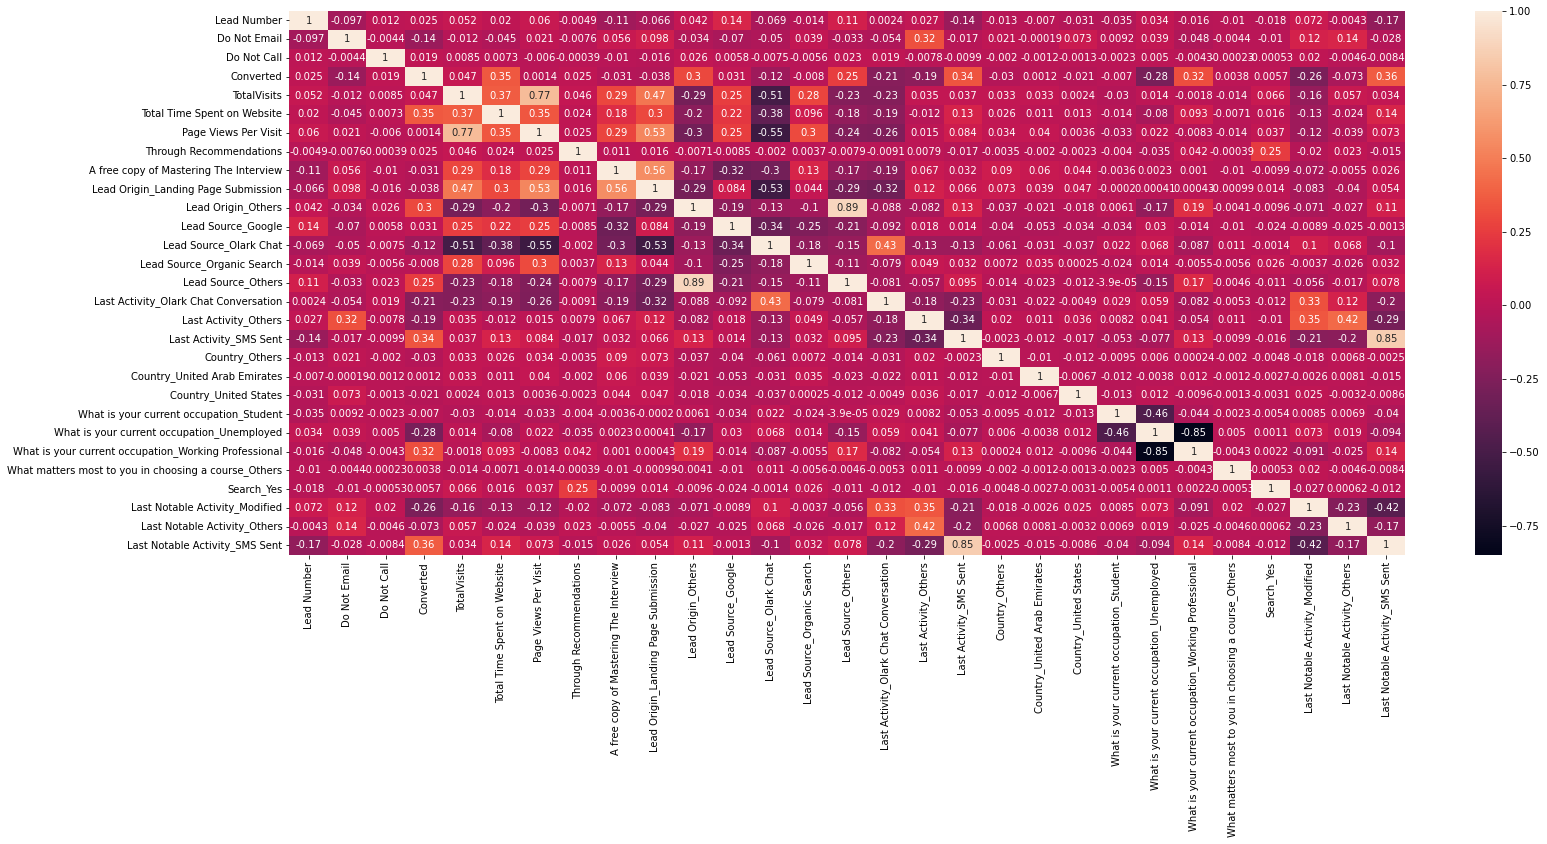

In [588]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,10))        # Size of the figure
sns.heatmap(lead.corr(),annot = True)
plt.show()

In [589]:
# Dropping variables that are highly correlated
X_test = X_test.drop(['Lead Origin_Others','Last Notable Activity_SMS Sent'], 1)
X_train = X_train.drop(['Lead Origin_Others','Last Notable Activity_SMS Sent'], 1)

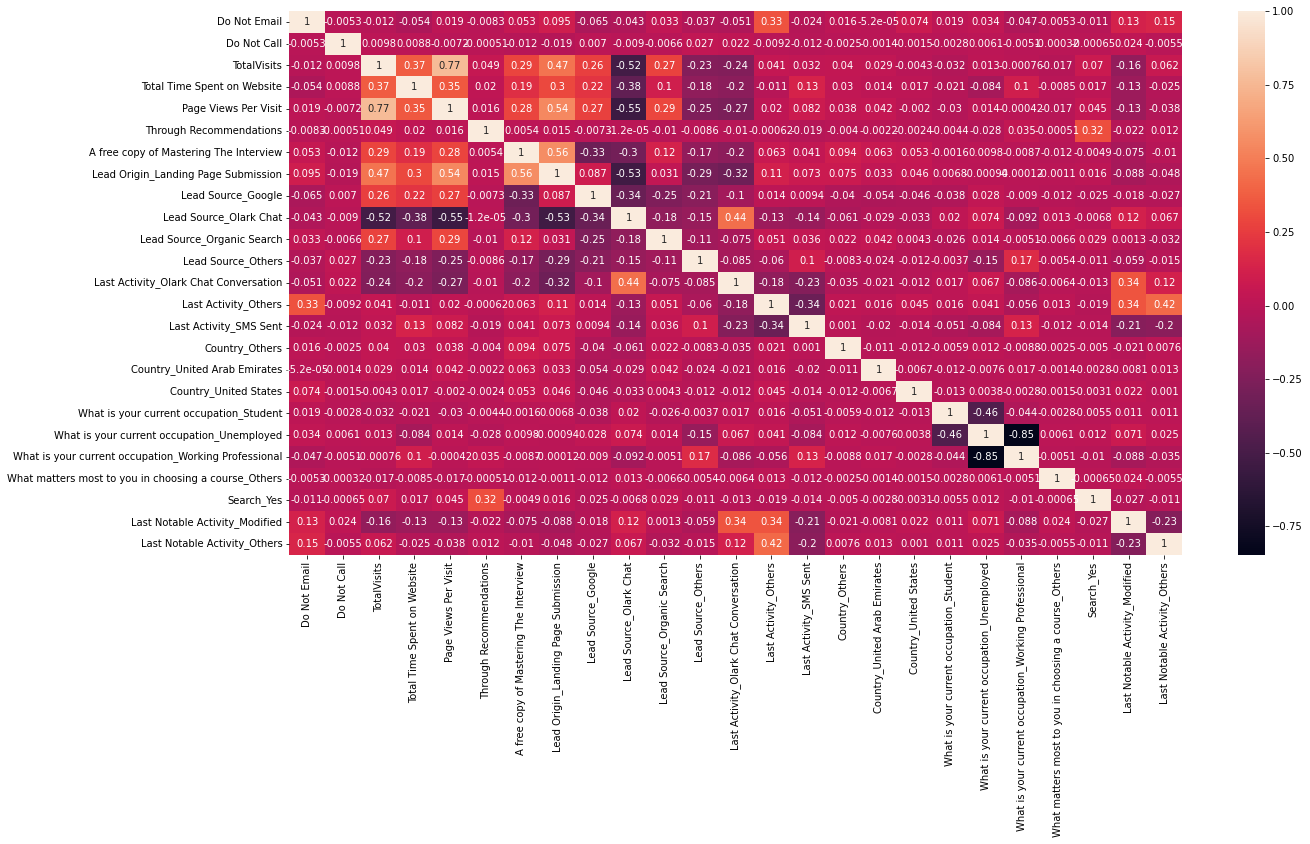

In [590]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 4 : Model Building

In [591]:
import statsmodels.api as sm

In [592]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6180
Model:                            GLM   Df Residuals:                     6154
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.1
Date:                Sun, 10 Jul 2022   Deviance:                       5254.2
Time:                        22:16:22   Pearson chi2:                 6.62e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4646      0.542      0.858      0.391      -0.597       1.526
Do Not Email                                            -1.1541      0.173     -6.672      0.000      -1.493      -0.815
Do Not Call                                             21.1934   1.17e+04      0.002      0.999   -2.29e+04    2.29e+04
TotalVisits                                              0.2093      0.054      3.876      0.000       0.103       0.315
Total Time Spent on Website                              1.0792      0.041     26.421      0.000       0.999       1.159
Page Views Per Visit                                    -0.3271      0.059     -5.571      0.000      -0.442      -0.212
Through Recommendations                                  1.9208      1.814      1.059      0.290      -1.634       5.475
A free copy of Mastering The Interview                  -0.0129      0.110     -0.117      0.906      -0.229       0.203
Lead Origin_Landing Page Submission                     -0.1580      0.108     -1.460      0.144      -0.370       0.054
Lead Source_Google                                       0.4009      0.119      3.365      0.001       0.167       0.634
Lead Source_Olark Chat                                   1.1005      0.162      6.783      0.000       0.783       1.419
Lead Source_Organic Search                               0.2242      0.135      1.657      0.098      -0.041       0.489
Lead Source_Others                                       2.8848      0.183     15.806      0.000       2.527       3.242
Last Activity_Olark Chat Conversation                   -1.3884      0.199     -6.975      0.000      -1.779      -0.998
Last Activity_Others                                    -0.2677      0.149     -1.796      0.072      -0.560       0.024
Last Activity_SMS Sent                                   1.3047      0.080     16.215      0.000       1.147       1.462
Country_Others                                          -0.5845      0.263     -2.220      0.026      -1.100      -0.068
Country_United Arab Emirates                             0.5378      0.407      1.322      0.186      -0.260       1.335
Country_United States                                   -0.0209      0.457     -0.046      0.964      -0.917       0.875
What is your current occupation_Student                 -1.2518      0.573     -2.184      0.029      -2.375      -0.128
What is your current occupation_Unemployed              -1.6974      0.532     -3.192      0.001      -2.740      -0.655
What is your current occupation_Working Professional     1.1976      0.563      2.126      0.034       0.093       2.302
What matters most to you in choosing a course_Others     2

In [593]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [594]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [595]:
rfe.support_

array([ True,  True, False,  True, False, False, False, False, False,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True, False,  True, False])

In [596]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Through Recommendations', False, 2),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_Others', False, 2),
 ('Country_United Arab Emirates', False, 2),
 ('Country_United States', False, 2),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('What matters most to you in choosing a course_Others', True, 1),
 ('Search_Yes', False, 2),
 ('Last Notable Activi

In [597]:
col = X_train.columns[rfe.support_]

In [598]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Last Activity_Others', 'Country_Others',
       'Country_United Arab Emirates', 'Country_United States', 'Search_Yes',
       'Last Notable Activity_Others'],
      dtype='object')

#### Statsmodel

In [599]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6180
Model:                            GLM   Df Residuals:                     6167
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2667.8
Date:                Sun, 10 Jul 2022   Deviance:                       5335.5
Time:                        22:16:29   Pearson chi2:                 6.54e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4448      0.524      0.849      0.396      -0.582       1.471
Do Not Email                                            -1.3195      0.166     -7.972      0.000      -1.644      -0.995
Do Not Call                                             21.4010   1.22e+04      0.002      0.999   -2.39e+04    2.39e+04
Total Time Spent on Website                              1.0722      0.040     26.674      0.000       0.993       1.151
Lead Source_Olark Chat                                   1.2004      0.104     11.563      0.000       0.997       1.404
Lead Source_Others                                       2.9487      0.138     21.376      0.000       2.678       3.219
Last Activity_Olark Chat Conversation                   -1.2433      0.175     -7.109      0.000      -1.586      -0.900
Last Activity_SMS Sent                                   1.3258      0.074     17.935      0.000       1.181       1.471
What is your current occupation_Student                 -1.2894      0.566     -2.279      0.023      -2.398      -0.181
What is your current occupation_Unemployed              -1.6775      0.524     -3.203      0.001      -2.704      -0.651
What is your current occupation_Working Professional     1.1813      0.555      2.127      0.033       0.093       2.270
What matters most to you in choosing a course_Others     1.9975      1.422      1.405      0.160      -0.789       4.784
Last Notable Activity_Modified                          -0.8611      0.079    -10.856      0.000      -1.017      -0.706
========================================================================================================================
"""

In [600]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [601]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.62
11,Last Notable Activity_Modified,1.87
3,Lead Source_Olark Chat,1.84
5,Last Activity_Olark Chat Conversation,1.60
6,Last Activity_SMS Sent,1.58
2,Total Time Spent on Website,1.30
4,Lead Source_Others,1.25
9,What is your current occupation_Working Profes...,1.24
0,Do Not Email,1.12
7,What is your current occupation_Student,1.04


In [602]:
# dropping the Do Not Call column as it has high pvalue
col = col.drop('Do Not Call',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Others',
       'Last Notable Activity_Modified'],
      dtype='object')

In [603]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6180
Model:                            GLM   Df Residuals:                     6168
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.1
Date:                Sun, 10 Jul 2022   Deviance:                       5340.1
Time:                        22:16:32   Pearson chi2:                 6.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4406      0.523      0.842      0.400      -0.585       1.467
Do Not Email                                            -1.3213      0.166     -7.981      0.000      -1.646      -0.997
Total Time Spent on Website                              1.0727      0.040     26.698      0.000       0.994       1.151
Lead Source_Olark Chat                                   1.1973      0.104     11.538      0.000       0.994       1.401
Lead Source_Others                                       2.9599      0.138     21.438      0.000       2.689       3.230
Last Activity_Olark Chat Conversation                   -1.2238      0.174     -7.050      0.000      -1.564      -0.884
Last Activity_SMS Sent                                   1.3251      0.074     17.924      0.000       1.180       1.470
What is your current occupation_Student                 -1.2873      0.565     -2.277      0.023      -2.396      -0.179
What is your current occupation_Unemployed              -1.6734      0.524     -3.196      0.001      -2.700      -0.647
What is your current occupation_Working Professional     1.1829      0.555      2.131      0.033       0.095       2.271
What matters most to you in choosing a course_Others     1.9961      1.422      1.404      0.160      -0.790       4.782
Last Notable Activity_Modified                          -0.8578      0.079    -10.823      0.000      -1.013      -0.702
========================================================================================================================
"""

In [604]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [605]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,2.62
10,Last Notable Activity_Modified,1.87
2,Lead Source_Olark Chat,1.84
4,Last Activity_Olark Chat Conversation,1.60
5,Last Activity_SMS Sent,1.58
1,Total Time Spent on Website,1.30
3,Lead Source_Others,1.25
8,What is your current occupation_Working Profes...,1.24
0,Do Not Email,1.12
6,What is your current occupation_Student,1.04


In [606]:
col = col.drop('What matters most to you in choosing a course_Others',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')

In [607]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6180
Model:                            GLM   Df Residuals:                     6169
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.9
Date:                Sun, 10 Jul 2022   Deviance:                       5341.8
Time:                        22:16:36   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4395      0.523      0.840      0.401      -0.586       1.465
Do Not Email                                            -1.3223      0.166     -7.989      0.000      -1.647      -0.998
Total Time Spent on Website                              1.0721      0.040     26.693      0.000       0.993       1.151
Lead Source_Olark Chat                                   1.1990      0.104     11.556      0.000       0.996       1.402
Lead Source_Others                                       2.9583      0.138     21.432      0.000       2.688       3.229
Last Activity_Olark Chat Conversation                   -1.2279      0.174     -7.076      0.000      -1.568      -0.888
Last Activity_SMS Sent                                   1.3237      0.074     17.911      0.000       1.179       1.469
What is your current occupation_Student                 -1.2870      0.565     -2.276      0.023      -2.395      -0.179
What is your current occupation_Unemployed              -1.6719      0.523     -3.194      0.001      -2.698      -0.646
What is your current occupation_Working Professional     1.1830      0.555      2.131      0.033       0.095       2.271
Last Notable Activity_Modified                          -0.8541      0.079    -10.787      0.000      -1.009      -0.699
========================================================================================================================
"""

In [608]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

53      0.024455
1928    0.916730
3016    0.230367
6338    0.375910
8532    0.111367
1262    0.135996
6988    0.587881
9096    0.587881
2314    0.886401
3338    0.088429
dtype: float64

In [609]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02445482, 0.91673022, 0.23036692, 0.37591022, 0.11136658,
       0.13599588, 0.58788125, 0.58788125, 0.88640144, 0.08842893])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [610]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.024455,53
1,1,0.916730,1928
2,0,0.230367,3016
3,1,0.375910,6338
4,0,0.111367,8532


In [611]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.024455,53,0
1,1,0.916730,1928,1
2,0,0.230367,3016,0
3,1,0.375910,6338,0
4,0,0.111367,8532,0


### Step 5 : Metrics Evaluation

In [612]:
from sklearn import metrics

In [613]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3378  459]
 [ 752 1591]]


In [614]:
# Predicted      not_Converted    Converted
# Actual
# not_Converted        3378          459
# Converted            752         1591  

In [615]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8040453074433657


The model has 80% accuracy which is good percentage

#### Checking VIF

In [616]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [617]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,2.62
9,Last Notable Activity_Modified,1.87
2,Lead Source_Olark Chat,1.84
4,Last Activity_Olark Chat Conversation,1.60
5,Last Activity_SMS Sent,1.58
1,Total Time Spent on Website,1.30
3,Lead Source_Others,1.25
8,What is your current occupation_Working Profes...,1.24
0,Do Not Email,1.12
6,What is your current occupation_Student,1.04


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Metrics beyond simply accuracy

In [618]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [619]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6790439607341016

The sensitivity rate is 67%

In [620]:
# Let us calculate specificity
TN / float(TN+FP)

0.8803752931978108

The specificity rate is 88%

In [621]:
# Calculate false postive rate - predicting Converted when customer has not converted
print(FP/ float(TN+FP))

0.11962470680218922


In [622]:
# positive predictive value 
print (TP / float(TP+FP))

0.7760975609756098


In [623]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8179176755447942


### Plotting the ROC Curve

In [624]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [625]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

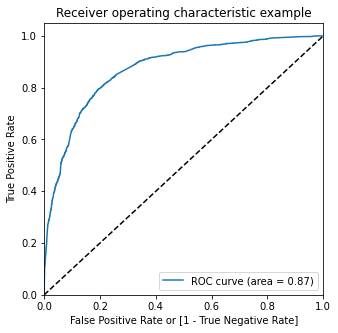

In [626]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The above graph shows area under the ROC curve 0.87

### Finding Optimal Cutoff Point

In [627]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.024455,53,0,1,0,0,0,0,0,0,0,0,0
1,1,0.916730,1928,1,1,1,1,1,1,1,1,1,1,1
2,0,0.230367,3016,0,1,1,1,0,0,0,0,0,0,0
3,1,0.375910,6338,0,1,1,1,1,0,0,0,0,0,0
4,0,0.111367,8532,0,1,1,0,0,0,0,0,0,0,0


In [628]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379126  1.000000  0.000000
0.1   0.1  0.573786  0.971404  0.330988
0.2   0.2  0.734628  0.913786  0.625228
0.3   0.3  0.786408  0.838668  0.754496
0.4   0.4  0.804369  0.758003  0.832682
0.5   0.5  0.804045  0.679044  0.880375
0.6   0.6  0.785922  0.571063  0.917123
0.7   0.7  0.761165  0.460521  0.944749
0.8   0.8  0.738188  0.355100  0.972114
0.9   0.9  0.691424  0.200171  0.991400


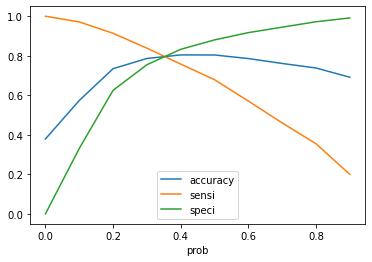

In [629]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [630]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.024455,53,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.916730,1928,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.230367,3016,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.375910,6338,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.111367,8532,0,1,1,0,0,0,0,0,0,0,0,0


In [631]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7864077669902912

In [632]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2895,  942],
       [ 378, 1965]], dtype=int64)

In [633]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [634]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8386683738796414

In [635]:
# Let us calculate specificity
TN / float(TN+FP)

0.7544956997654417

with cut off 0.3, the sensitivity and specificity is 83% and 75% resp3ectively

In [636]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.24550430023455824


In [637]:
# Positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.675954592363261
0.8845096241979835


#### Precision and recall

In [638]:
from sklearn.metrics import precision_score, recall_score

In [639]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7760975609756098

In [640]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6790439607341016

In [641]:
# Tradeoff

In [642]:
from sklearn.metrics import precision_recall_curve

In [643]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

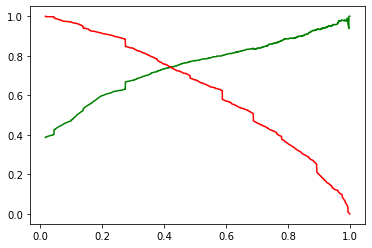

In [644]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 6 : Making predictions on the test set

In [645]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [646]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified
1523,0,1.597012,0,0,0,0,0,1,0,0
5850,0,-0.809731,0,0,0,0,0,1,0,0
3447,0,-0.872196,0,1,0,0,0,1,0,0
1011,0,-0.732568,0,0,0,0,0,1,0,0
7316,0,1.224059,0,0,0,0,0,1,0,0


In [647]:
X_test_sm = sm.add_constant(X_test)

In [648]:
y_test_pred = res.predict(X_test_sm)

In [649]:
y_test_pred[:10]

1523    0.617710
5850    0.109049
3447    0.688014
1011    0.117350
7316    0.519986
3001    0.745387
1495    0.165493
5777    0.191867
483     0.065394
3713    0.110856
dtype: float64

In [650]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [651]:
# Let's see the head
y_pred_1.head()

,0
1523,0.617710
5850,0.109049
3447,0.688014
1011,0.117350
7316,0.519986


In [652]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [653]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [654]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [655]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [656]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,1523,0.617710
1,0,5850,0.109049
2,1,3447,0.688014
3,0,1011,0.117350
4,1,7316,0.519986


In [657]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [658]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [659]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,1523,0,0.617710
1,5850,0,0.109049
2,3447,1,0.688014
3,1011,0,0.117350
4,7316,1,0.519986


In [660]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [661]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,1523,0,0.617710,1
1,5850,0,0.109049,0
2,3447,1,0.688014,1
3,1011,0,0.117350,0
4,7316,1,0.519986,1


In [662]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7799169497923745

In [663]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1228,  437],
       [ 146,  838]], dtype=int64)

In [664]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [665]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8516260162601627

In [666]:
# Let us calculate specificity
TN / float(TN+FP)

0.7375375375375376

In [667]:
y_pred_final['Lead_Score'] = (y_pred_final.Converted_Prob*100).round()

In [668]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
0,1523,0,0.617710,1,62.0
1,5850,0,0.109049,0,11.0
2,3447,1,0.688014,1,69.0
3,1011,0,0.117350,0,12.0
4,7316,1,0.519986,1,52.0


In [669]:
student = y_pred_final[['Lead Number', 'Lead_Score']]
student['Student'] = student['Lead Number']
student.pop('Lead Number')
student.head()

,Lead_Score,Student
0,62.0,1523
1,11.0,5850
2,69.0,3447
3,12.0,1011
4,52.0,7316


In [670]:
# For the client
df1 = student.pop('Lead_Score')
student['Lead_Score'] = df1
student.head()

,Student,Lead_Score
0,1523,62.0
1,5850,11.0
2,3447,69.0
3,1011,12.0
4,7316,52.0


In [671]:
# Getting the coefficients of all the variables.
final_parameters = res.params[:]
final_parameters

const                                                   0.439525
Do Not Email                                           -1.322266
Total Time Spent on Website                             1.072127
Lead Source_Olark Chat                                  1.198980
Lead Source_Others                                      2.958316
Last Activity_Olark Chat Conversation                  -1.227927
Last Activity_SMS Sent                                  1.323698
What is your current occupation_Student                -1.287025
What is your current occupation_Unemployed             -1.671885
What is your current occupation_Working Professional    1.183047
Last Notable Activity_Modified                         -0.854118
dtype: float64

In [672]:
student.head(10).to_csv('student.csv')